In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf

In [2]:
yf.pdr_override()
start = '2022-12-1'
end = '2022-12-15'
df = pdr.get_data_yahoo('MSFT', start, end)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-01,253.869995,256.119995,250.919998,254.690002,254.053665,26041500
2022-12-02,249.820007,256.059998,249.690002,255.020004,254.382843,21528500
2022-12-05,252.009995,253.820007,248.059998,250.199997,249.574890,23435300
2022-12-06,250.820007,251.860001,243.779999,245.119995,244.507568,22463700
2022-12-07,244.830002,246.160004,242.210007,244.369995,243.759445,20481500
2022-12-08,244.839996,248.740005,243.059998,247.399994,246.781876,22611800
2022-12-09,244.699997,248.309998,244.160004,245.419998,244.806824,20609700
2022-12-12,247.449997,252.539993,247.169998,252.509995,251.879105,30665100
2022-12-13,261.690002,263.920013,253.070007,256.920013,256.278107,42196900


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-25,294.989990,285.170013,291.519989,288.489990,72848600.0,287.225739
2022-01-26,308.500000,293.029999,307.989990,296.709991,90428900.0,295.409729
2022-01-27,307.299988,297.929993,302.660004,299.839996,53481300.0,298.525970
2022-01-28,308.480011,294.450012,300.230011,308.260010,49743700.0,306.909088
2022-01-31,312.380005,306.369995,308.950012,310.980011,46444500.0,309.617188


In [4]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,30.990000,30.480000,30.980000,30.480000,31929700.0,23.438801
1,2010-01-04,31.100000,30.590000,30.620001,30.950001,38409100.0,23.800224
2,2010-01-05,31.100000,30.639999,30.850000,30.959999,49749600.0,23.807915
3,2010-01-06,31.080000,30.520000,30.879999,30.770000,58182400.0,23.661804
4,2010-01-07,30.700001,30.190001,30.629999,30.450001,50559700.0,23.415733


In [5]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,30.990000,30.480000,30.980000,30.480000,31929700.0
1,31.100000,30.590000,30.620001,30.950001,38409100.0
2,31.100000,30.639999,30.850000,30.959999,49749600.0
3,31.080000,30.520000,30.879999,30.770000,58182400.0
4,30.700001,30.190001,30.629999,30.450001,50559700.0


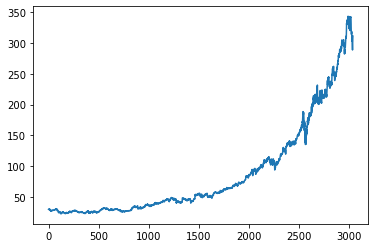

In [6]:
plt.plot(df.Close)

In [7]:
df

,High,Low,Open,Close,Volume
0,30.990000,30.480000,30.980000,30.480000,31929700.0
1,31.100000,30.590000,30.620001,30.950001,38409100.0
2,31.100000,30.639999,30.850000,30.959999,49749600.0
3,31.080000,30.520000,30.879999,30.770000,58182400.0
4,30.700001,30.190001,30.629999,30.450001,50559700.0
...,...,...,...,...,...
3037,294.989990,285.170013,291.519989,288.489990,72848600.0
3038,308.500000,293.029999,307.989990,296.709991,90428900.0
3039,307.299988,297.929993,302.660004,299.839996,53481300.0
3040,308.480011,294.450012,300.230011,308.260010,49743700.0


In [8]:
df.shape

(3042, 5)

In [9]:
# Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2129, 1)
(913, 1)


In [10]:
data_training.head()

,Close
0,30.480000
1,30.950001
2,30.959999
3,30.770000
4,30.450001


In [11]:
data_testing.head()

,Close
2129,100.860001
2130,100.860001
2131,101.870003
2132,101.139999
2133,100.410004


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [13]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.0939859 ],
       [0.09989936],
       [0.10002515],
       ...,
       [0.97936589],
       [0.9865375 ],
       [0.97030699]])

In [14]:
data_training_array.shape

(2129, 1)

In [15]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [16]:
x_train.shape

(2029, 100, 1)

In [17]:
# ML Model

In [18]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [19]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [21]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
64/64 [==============================] - 14s 153ms/step - loss: 0.0216
Epoch 2/50
64/64 [==============================] - 10s 154ms/step - loss: 0.0042
Epoch 3/50
64/64 [==============================] - 10s 159ms/step - loss: 0.0043
Epoch 4/50
64/64 [==============================] - 11s 165ms/step - loss: 0.0038
Epoch 5/50
64/64 [==============================] - 10s 163ms/step - loss: 0.0038
Epoch 6/50
64/64 [==============================] - 10s 163ms/step - loss: 0.0037
Epoch 7/50
64/64 [==============================] - 10s 164ms/step - loss: 0.0037
Epoch 8/50
64/64 [==============================] - 11s 177ms/step - loss: 0.0032
Epoch 9/50
64/64 [==============================] - 11s 179ms/step - loss: 0.0034
Epoch 10/50
64/64 [==============================] - 12s 195ms/step - loss: 0.0028
Epoch 11/50
64/64 [==============================] - 12s 189ms/step - loss: 0.0035
Epoch 12/50
64/64 [==============================] - 12s 185ms/step - loss: 0.0034
Epoch 13/50
6

In [22]:
model.save('newkeras_model.h5')

In [23]:
data_testing.head()

,Close
2129,100.860001
2130,100.860001
2131,101.870003
2132,101.139999
2133,100.410004


In [24]:
data_training.tail(100)

,Close
2029,91.820000
2030,92.330002
2031,94.059998
2032,93.919998
2033,92.739998
...,...
2124,101.050003
2125,101.309998
2126,100.849998
2127,101.419998


In [25]:
past_100_days = data_training.tail(100)

In [26]:
final_df = past_100_days.append(data_testing, ignore_index = True)

C:\Users\tyagi\AppData\Local\Temp\ipykernel_28052\3299050086.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


In [27]:
final_df.head()

,Close
0,91.820000
1,92.330002
2,94.059998
3,93.919998
4,92.739998


In [29]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02638511],
       [0.0283611 ],
       [0.03506391],
       ...,
       [0.83235183],
       [0.8649749 ],
       [0.87551346]])

In [30]:
input_data.shape

(1013, 1)

In [31]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [32]:
print(x_test.shape)
print(y_test.shape)

(913, 100, 1)
(913,)


In [33]:
# Making Predictions

In [34]:
y_predicted = model.predict(x_test)

29/29 [==============================] - 8s 201ms/step


In [35]:
y_predicted.shape

(913, 1)

In [36]:
y_test

array([0.0614103 , 0.0614103 , 0.06532352, 0.06249515, 0.05966681,
       0.05184036, 0.05451376, 0.04854707, 0.05277023, 0.05269275,
       0.05811701, 0.05439753, 0.0571484 , 0.06257266, 0.06524602,
       0.06629214, 0.06574972, 0.07431229, 0.07911662, 0.07710191,
       0.08113133, 0.07791554, 0.07512592, 0.08237116, 0.08895777,
       0.0877567 , 0.10003875, 0.09535065, 0.08783417, 0.07888416,
       0.08163503, 0.08240991, 0.08740798, 0.08922898, 0.08957767,
       0.09248352, 0.09484695, 0.09554435, 0.09294847, 0.08988763,
       0.09511816, 0.0877567 , 0.08767919, 0.08744673, 0.08469586,
       0.08124759, 0.08543199, 0.08736922, 0.09062379, 0.09527314,
       0.0978303 , 0.10464935, 0.10437813, 0.10585045, 0.10344827,
       0.09097248, 0.0919411 , 0.08988763, 0.09442075, 0.10162727,
       0.10344827, 0.10809765, 0.1098799 , 0.10511429, 0.10925997,
       0.10340952, 0.11065478, 0.11332817, 0.11491669, 0.1140643 ,
       0.11224333, 0.11390935, 0.11375437, 0.1185587 , 0.11677

In [37]:
y_predicted

array([[0.08693427],
       [0.08816855],
       [0.08904484],
       [0.08955781],
       [0.08974008],
       [0.08962905],
       [0.08922916],
       [0.08855449],
       [0.08759561],
       [0.08637485],
       [0.08494   ],
       [0.08338825],
       [0.0818175 ],
       [0.08033017],
       [0.07904852],
       [0.07808562],
       [0.07753403],
       [0.07745035],
       [0.07786763],
       [0.0788285 ],
       [0.08038829],
       [0.08252952],
       [0.08514255],
       [0.08809721],
       [0.09123671],
       [0.0944002 ],
       [0.09745902],
       [0.10036425],
       [0.10306051],
       [0.10548927],
       [0.10753217],
       [0.10906094],
       [0.10998512],
       [0.11033425],
       [0.11018918],
       [0.10968737],
       [0.10899179],
       [0.1082835 ],
       [0.10772488],
       [0.10741374],
       [0.10737794],
       [0.10762237],
       [0.10808717],
       [0.10868112],
       [0.10930736],
       [0.10984814],
       [0.1101711 ],
       [0.110

In [38]:
scaler.scale_

array([0.00387447])

In [39]:
scale_factor = 1/0.00387447
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

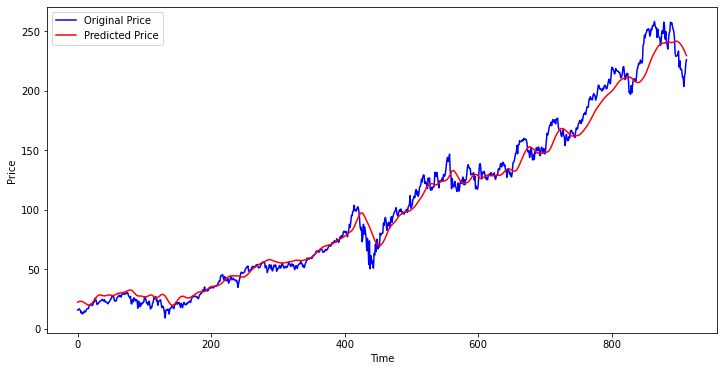

In [40]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()